## Linear Programming Dengan Python - Menentukan Tempat untuk Pergi Liburan

Berikut ini Contoh Membangun Program Linier dalam Python dengan modul PULP.

Rumusan Masalah: Anda ingin berlibur, tetapi Anda hanya memiliki jumlah hari terbatas. Selain itu, kami juga ingin menjaga biaya seminimal mungkin. Dan internet menawarkan banyak pilihan cara memutuskan, sehingga paket / campuran paket mana yang harus kita pilih?

- Tujuan: Meminimalkan Biaya Liburan sambil memilih Paket Liburan Optimal. (Objective function)

- Bentuk LP: Minimalisasi

- Variabel Keputusan: Variabel Biner apakah akan membeli paket atau tidak. (Decision Variables)

- Batasan: Waktu Liburan Terbatas {satuan dalam hari} (Constrains)


Sumber : https://github.com/AnnaNican/optimizers

In [22]:
#memasukan modul yang digunakan
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import re 
import matplotlib.pyplot as plt
%matplotlib inline

from pulp import *

### Cara Mendapatkan Data

Ada beberapa situs web yang menyediakan paket liburan dengan harga penuh dan diskon. Dataset dari kasus ini diambil dari The Clymb Adventures https://www.theclymb.com/Adventures.aspx

### Memahami Dataset

Dataset berisi:

- Tujuan terakhir
- Durasi perjalanan
- Total Biaya perjalanan
- Deskripsi singkat tentang tempat liburan

In [23]:
#membuka data 
df = open("clymb_adventures.csv")
df

<_io.TextIOWrapper name='clymb_adventures.csv' mode='r' encoding='cp1252'>

In [24]:
#membaca dan melihat 5 data pertama
data = pd.read_csv("clymb_adventures.csv", encoding='cp1252')
data.head()

,destination,duration,cost,description
0,Baja,7,899,Hike Bike and Sea Kayak and more on a Remote P...
1,Nepal,11,899,Explore the land and culture of the Himalayas....
2,Spain,8,568,Sport climb & deep water solo in Mallorca. Dis...
3,Yosemite,5,750,Guided hiking through stunning high country. E...
4,Utah,6,1356,Hike. Canyoneer. Rock Climb. and more!. Experi...


In [25]:
#melihat banyaknya destinasi yang ada
print("Daftar Nama Tempat Destinasi : ", data['destination'].unique())
print('='*100)
print("Jumlah Destinansi yang ada : ", len(data['destination'].unique()))

Daftar Nama Tempat Destinasi :  ['Baja' 'Nepal' 'Spain' 'Yosemite' 'Utah' 'San Juan Islands' 'Oregon'
 'Hawaii' 'Alaska' 'New England' 'Colorado' 'Washington Cascades' 'Maine'
 'Peru' 'Vietnam' 'Patagonia' 'Peru and Galapagos' 'Ecuador'
 'Vietnam Thailand and Cambodia' 'Dominican Republic' 'Costa Rica' 'Crete']
Jumlah Destinansi yang ada :  22


In [26]:
#melihat info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
destination    42 non-null object
duration       42 non-null int64
cost           42 non-null int64
description    42 non-null object
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


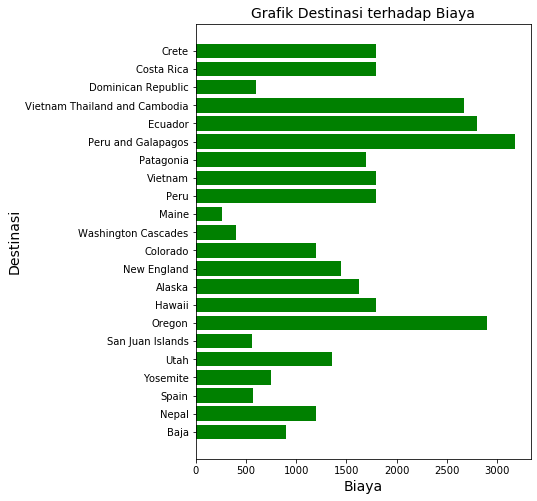

In [27]:
#membuat grafik destinasi terhadap biaya
fig = plt.figure(figsize=(6,8))

x1 = data['destination']
y = data['cost']

plt.barh(x1, y, color='green')
plt.title("Grafik Destinasi terhadap Biaya", fontsize = 14)
plt.ylabel("Destinasi", fontsize = 14)
plt.xlabel("Biaya", fontsize = 14)
plt.show()

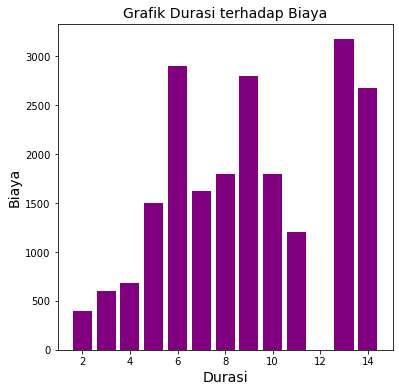

In [28]:
#membuat grafik durasi terhadap biaya
fig = plt.figure(figsize=(6,6))

x2 = data['duration']
y = data['cost']

plt.bar(x2, y, color='purple')
plt.title("Grafik Durasi terhadap Biaya", fontsize = 14)
plt.xlabel("Durasi", fontsize = 14)
plt.ylabel("Biaya", fontsize = 14)
plt.show()

Text(0, 0.5, 'Biaya')

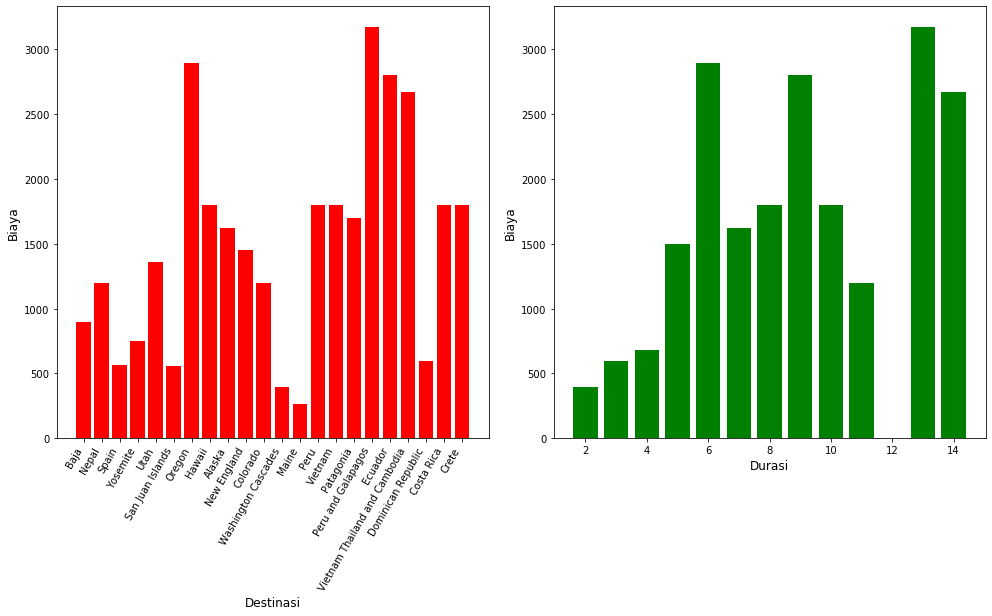

In [29]:
#Grafik destinasi terhadap biaya
#membuat frame dengan ukuran [-0.5,1,1,1.5]
plt.axes([-0.5,1,1,1.5]) #left, bottom, width, hight

#membuat barchart 1
plt.bar(x1,y, color = 'red', linewidth = 2.4)
plt.xlabel("Destinasi", fontsize=12)
plt.ylabel("Biaya", fontsize=12)
plt.xticks(rotation = 60, horizontalalignment='right')

#grafik durasi terhadap biaya
#membuat frame dengan ukuran [0.6,1,1,1.5]
plt.axes([0.65,1,1,1.5])

#membuat barchart 2
plt.bar(x2, y, color = 'green', linewidth = 3.4)
plt.xlabel("Durasi", fontsize=12)
plt.ylabel("Biaya", fontsize=12)

### Menyiapkan Bahan Untuk Proses Linear Programming (LP):

    1. Menentukan Objek LP
    2. Membuat Variabel Keputusan
    3. Menentukan Fungsi Objektif atau Fungsi Sasaran
    4. Menentukan Batasan atau Constrain

### 1. Menentukan Objek LP

   Variabel peluang_jawaban dibuat untuk berisi formulasi, dan parameter yang biasa dimasukan ke dalam LpProblem.

In [30]:
#membuat objek LP
#atur sebagai masalah minimisasi -> karena kita ingin meminimalkan biaya 

peluang_jawaban = pulp.LpProblem('Going_On_Vacation', pulp.LpMinimize)

### 2. Membuat Variabel Keputusan

In [31]:
decision_variables = []
for rownum, row in data.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
    decision_variables.append(variable)

print ("Jumlah Total Variabel Keputusan: ", len(decision_variables))
print ("Array dengan Variabel Keputusan:", decision_variables)

Jumlah Total Variabel Keputusan:  42
Array dengan Variabel Keputusan: [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41]


### 3. Menentukan Fungsi Tujuan atau Fungsi Sasaran: Meminimalkan Biaya Perjalanan LIburan

Variabel peluang_jawaban, sekarang mulai mengumpulkan data permasalahan tersebut dengan operator "+=". Fungsi tujuan secara logis dimasukkan terlebih dahulu, dengan koma yang penting, di akhir pernyataan hasil yang menjelaskan seperti apa fungsi tujuan ini:

In [32]:
total_cost = ""
for rownum, row in data.iterrows():
    for i, schedule in enumerate(decision_variables):
        if rownum == i:
            formula = row['cost']*schedule
            total_cost += formula

peluang_jawaban += total_cost
print ("Fungsi Optimasi Untuk Biaya: ", total_cost)

Fungsi Optimasi Untuk Biaya:  899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9


### 4. Menentukan Batasan atau Constrain : Paket Liburan yang dipilih tidak boleh melebihi total hari liburan yang sudah ditentukan 

In [33]:
aval_vacation_days = 10
total_vacation_days = ""
for rownum, row in data.iterrows():
    for i, schedule in enumerate(decision_variables):
        if rownum == i:
            formula = row['duration']*schedule
            total_vacation_days += formula

peluang_jawaban += (total_vacation_days == aval_vacation_days)
print("Fungsi Optimasi untuk Waktu Liburan", total_vacation_days)

Fungsi Optimasi untuk Waktu Liburan 7*x0 + 11*x1 + 2*x10 + 2*x11 + 3*x12 + 2*x13 + 3*x14 + 4*x15 + 7*x16 + 8*x17 + 10*x18 + 7*x19 + 8*x2 + 13*x20 + 3*x21 + 5*x22 + 2*x23 + 5*x24 + 9*x25 + 14*x26 + 8*x27 + 4*x28 + 6*x29 + 5*x3 + 8*x30 + 11*x31 + 8*x32 + 8*x33 + 13*x34 + 4*x35 + 6*x36 + 3*x37 + 5*x38 + 4*x39 + 6*x4 + 2*x40 + 2*x41 + 4*x5 + 4*x6 + 6*x7 + 10*x8 + 7*x9


## Melihat Bentuk dari Hasil Proses Linear Programming

In [34]:
print(peluang_jawaban)
peluang_jawaban.writeLP("Going_On_Vacation.lp")

Going_On_Vacation:
MINIMIZE
899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9 + 0
SUBJECT TO
_C1: 7 x0 + 11 x1 + 2 x10 + 2 x11 + 3 x12 + 2 x13 + 3 x14 + 4 x15 + 7 x16
 + 8 x17 + 10 x18 + 7 x19 + 8 x2 + 13 x20 + 3 x21 + 5 x22 + 2 x23 + 5 x24
 + 9 x25 + 14 x26 + 8 x27 + 4 x28 + 6 x29 + 5 x3 + 8 x30 + 11 x31 + 8 x32
 + 8 x33 + 13 x34 + 4 x35 + 6 x36 + 3 x37 + 5 x38 + 4 x39 + 6 x4 + 2 x40
 + 2 x41 + 4 x5 + 4 x6 + 6 x7 + 10 x8 + 7 x9 = 10

VARIABLES
0 <= x0 <= 1 Integer
0 <= x1 <= 1 Integer
0 <= x10 <= 1 Integer
0 <= x11 <= 1 Integer
0 <= x12 <= 1 Integer
0 <= x13 <= 1 Integer
0 <= x14 <= 1 Integer
0 <= x15 <= 1 Integer


## Melihat Hasil Optimasi Aktual (Sebenarnya)

In [35]:
optimization_result = peluang_jawaban.solve()

assert optimization_result == pulp.LpStatusOptimal

#melihat status 
print("Status:", LpStatus[peluang_jawaban.status])

#melihat solusi optimal
print("Solusi Optimal dari Soal: ", value(peluang_jawaban.objective))

#melihat variabel keputusan 
print("Individual decision_variables: ")
for v in peluang_jawaban.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
Solusi Optimal dari Soal:  762.0
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 0.0
x14 = 0.0
x15 = 1.0
x16 = 0.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 0.0
x22 = 0.0
x23 = 0.0
x24 = 0.0
x25 = 0.0
x26 = 0.0
x27 = 0.0
x28 = 0.0
x29 = 0.0
x3 = 0.0
x30 = 0.0
x31 = 0.0
x32 = 0.0
x33 = 0.0
x34 = 0.0
x35 = 1.0
x36 = 0.0
x37 = 0.0
x38 = 0.0
x39 = 0.0
x4 = 0.0
x40 = 1.0
x41 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0


## Menyimpan Hasil dalam Bentuk DataFrame

Menggunakan no variabel/baris sebagai indeks untuk menambahkan hasilnya kembali ke dataset awal.

In [36]:
#membuat wadah atau tempat
variable_name = []
variable_value = []

#memanggil nama variabel dengan nilainya 
#misalnya x10 nilainya 100
for v in peluang_jawaban.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

#menyimpan hasil nama variabel dengan nilainya yang sudah dipanggil ke dalam dataFrame 
df = pd.DataFrame({'variable': variable_name, 'value': variable_value})

#memisahkan nomor variabel dengan nama variabelnya dari kolom 'variable'
#misalnya x10 menjadi x 10 (x spasi 10) 
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['variable']) #dari ['x10'] menjadi ['10'] 
    df.loc[rownum, 'variable'] = int(value[0]) #dari ['10'] menjadi 10 (index 10) dan menyimpannya dalam bentuk dataFrame

#mengurutkan dataFrame berdasarkan kolom 'variable'
df = df.sort_index(by='variable')

#menggabungkan df hasil sorting di atas ke dalam data awal
for rownum, row in data.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            data.loc[rownum, 'decision'] = results_row['value'] #membuat kolom decision dan memasukan nilai barisnya dengan hasil nilai dari proses LP

#melihat 10 data pertama
data.head(10)

,destination,duration,cost,description,decision
0,Baja,7,899,Hike Bike and Sea Kayak and more on a Remote P...,0.0
1,Nepal,11,899,Explore the land and culture of the Himalayas....,0.0
2,Spain,8,568,Sport climb & deep water solo in Mallorca. Dis...,0.0
3,Yosemite,5,750,Guided hiking through stunning high country. E...,0.0
4,Utah,6,1356,Hike. Canyoneer. Rock Climb. and more!. Experi...,0.0
5,Utah,4,680,Ride mountain bike through Canyonlands. Follow...,0.0
6,San Juan Islands,4,559,Kayak in search of orca whales. Kayak amongst ...,0.0
7,Oregon,6,899,Circumnavigate Crater Lake. Experience the pri...,0.0
8,Hawaii,10,1799,Surf. Hike. Zipline. Swim. Snorkel. And more!....,0.0
9,Alaska,7,1625,Wilderness Packrafting. Packrafting is quickly...,0.0


In [37]:
#Melihat hasil variabel yang optimal dalam hal ini paket liburan mana yang seharusnya dipilih
data[data['decision'] == 1]

,destination,duration,cost,description,decision
15,Maine,4,265,Ride endless singletrack. Escape to Western Ma...,1.0
35,Oregon,4,299,Mountain bike from hut-to-hut on the Mt Hood L...,1.0
40,Oregon,2,198,Learn to windsurf in Hood River. Trip for 2!. ...,1.0


In [38]:
#melihat total jumlah biaya minimum untuk perjalanan liburan
data[data['decision'] == 1]['cost'].sum()

762

                            ##Semoga Bermanfaat
                            ##@Raspiani_